Columns in dataset: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1 

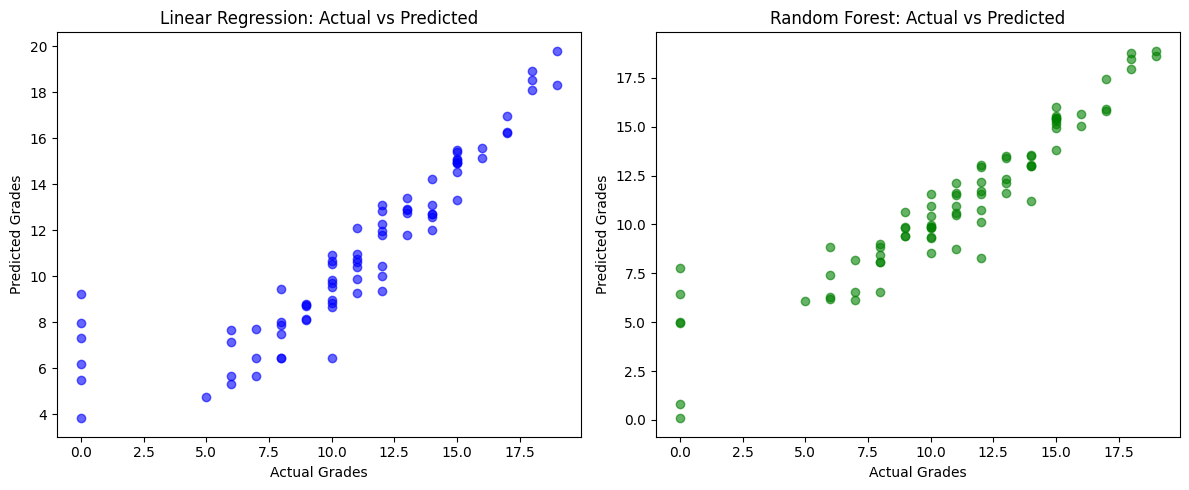

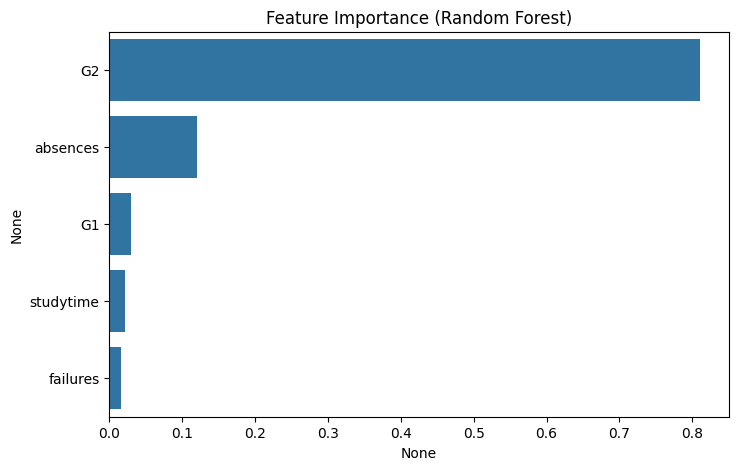

In [7]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Load dataset from Google Drive (comma-separated!)
url = "https://drive.google.com/uc?id=1XWURdSBkD4OYEHzy3dWEMIjc6HQToRdM"
df = pd.read_csv(url, sep=",")

print("Columns in dataset:", df.columns.tolist())
print(df.head())

#Select features and target
features = ["studytime", "failures", "absences", "G1", "G2"]
X = df[features]
y = df["G3"]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

#Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

#Evaluate models
print("Linear Regression:")
print("  MSE:", mean_squared_error(y_test, y_pred_lin))
print("  R² :", r2_score(y_test, y_pred_lin))

print("\nRandom Forest Regressor:")
print("  MSE:", mean_squared_error(y_test, y_pred_rf))
print("  R² :", r2_score(y_test, y_pred_rf))

#Visualization - Actual vs Predicted
plt.figure(figsize=(12,5))

# Linear Regression plot
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lin, color="blue", alpha=0.6)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Linear Regression: Actual vs Predicted")

# Random Forest plot
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.6)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Random Forest: Actual vs Predicted")

plt.tight_layout()
plt.show()

#Feature Importance (Random Forest)
feature_importance = pd.Series(rf_reg.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance (Random Forest)")
plt.show()
